In [38]:
import pandas as pd
import xgboost
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [39]:
data = pd.read_csv("./ts-temp-1/MLTempDataset.csv")
data2 = pd.read_csv("./ts-temp-1/MLTempDataset1.csv")

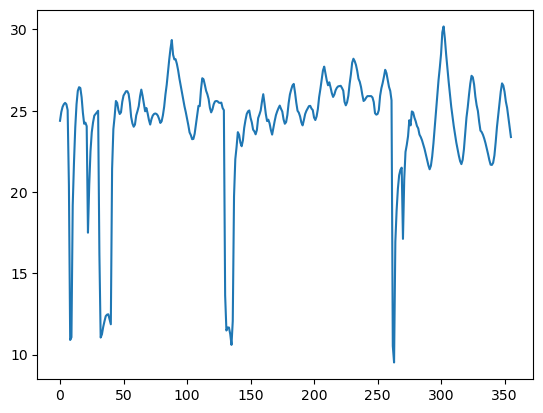

In [40]:
plt.plot(data2.Hourly_Temp.values[6700:])

In [41]:
data2.head(10)

,Unnamed: 0,Datetime,Hourly_Temp
0,0,2022-01-04 00:00:00,20.867
1,1,2022-01-04 01:00:00,21.000
2,2,2022-01-04 02:00:00,20.867
3,3,2022-01-04 03:00:00,20.650
4,4,2022-01-04 04:00:00,20.400
5,5,2022-01-04 05:00:00,20.100
6,6,2022-01-04 06:00:00,19.800
7,7,2022-01-04 07:00:00,19.500
8,8,2022-01-04 08:00:00,19.400
9,9,2022-01-04 09:00:00,19.500


<AxesSubplot: >

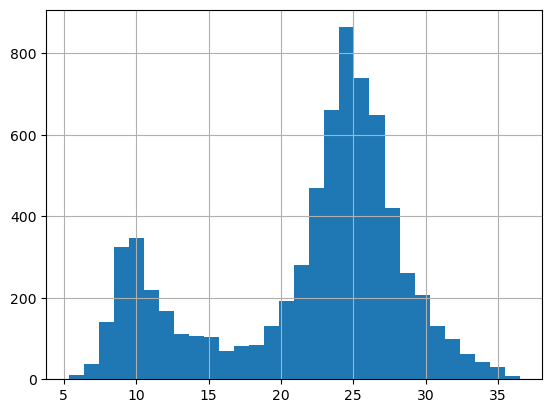

In [42]:
data2.Hourly_Temp.hist(bins=30)

In [43]:
data2['log_temp'] = data2['Hourly_Temp'].apply(lambda x: np.log10(x))

In [44]:
data2['date_timestamp'] = data2['Datetime'].apply(lambda x: pd.Timestamp(x).timestamp())

In [45]:
time_series = data2[['Hourly_Temp','Datetime']]
time_series.index = pd.to_datetime(time_series['Datetime'])
time_series = time_series.drop(columns=['Datetime'])

In [46]:
X = data2['Datetime']
Y = data2['Hourly_Temp']

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(time_series, model="multiplicative")

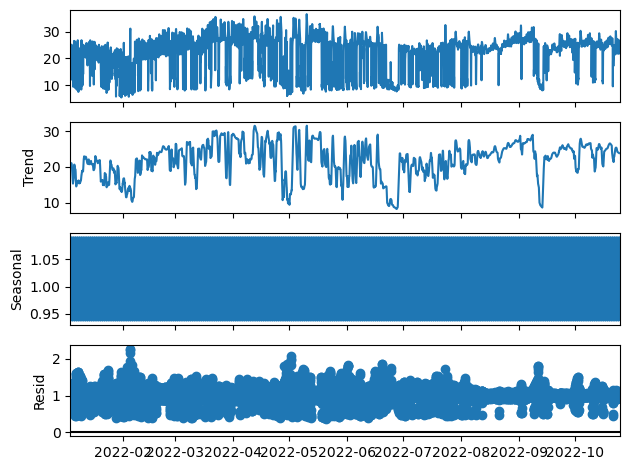

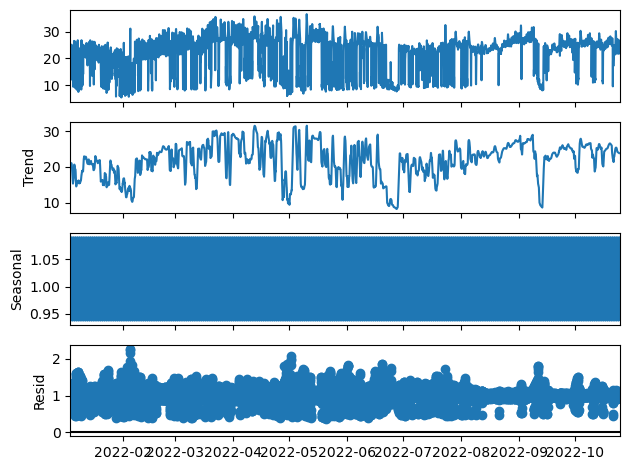

In [48]:
result.plot()

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
time_series = scaler.fit_transform(time_series)

In [51]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [53]:
sequence_lenght = 24

X, y = [], []

for i in range(len(time_series) - sequence_lenght):
    X.append(time_series[i:i+sequence_lenght])
    y.append(time_series[i+sequence_lenght])
    
X, y = np.array(X), np.array(y)
    
train_size = int(len(X)*0.8)
    
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [54]:
model = Sequential()

model.add(LSTM(units=50, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer="adam", loss = "mean_squared_error")

2023-10-20 21:24:19.016345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-20 21:24:19.018234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-20 21:24:19.019389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [55]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2023-10-20 21:24:21.452627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-20 21:24:21.455438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-20 21:24:21.456552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

176/176 [==============================] - 3s 10ms/step - loss: 0.0371
Epoch 2/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0162
Epoch 3/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0112
Epoch 4/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0102
Epoch 5/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0093
Epoch 6/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0091
Epoch 7/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0089
Epoch 8/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0087
Epoch 9/50
176/176 [==============================] - 1s 8ms/step - loss: 0.0088
Epoch 10/50
176/176 [==============================] - 1s 8ms/step - loss: 0.0088
Epoch 11/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0086
Epoch 12/50
176/176 [==============================] - 2s 9ms/step - loss: 0.0087
Epoch 13/50
176/176 [==============

In [56]:
preds = model.predict(X_test)

13/44 [=======>......................] - ETA: 0s 

2023-10-20 21:25:38.814483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-20 21:25:38.815918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-20 21:25:38.816896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

44/44 [==============================] - 0s 4ms/step


In [57]:
predicted_temperature = scaler.inverse_transform(preds)

In [59]:
y_test_reversed = scaler.inverse_transform(y_test)

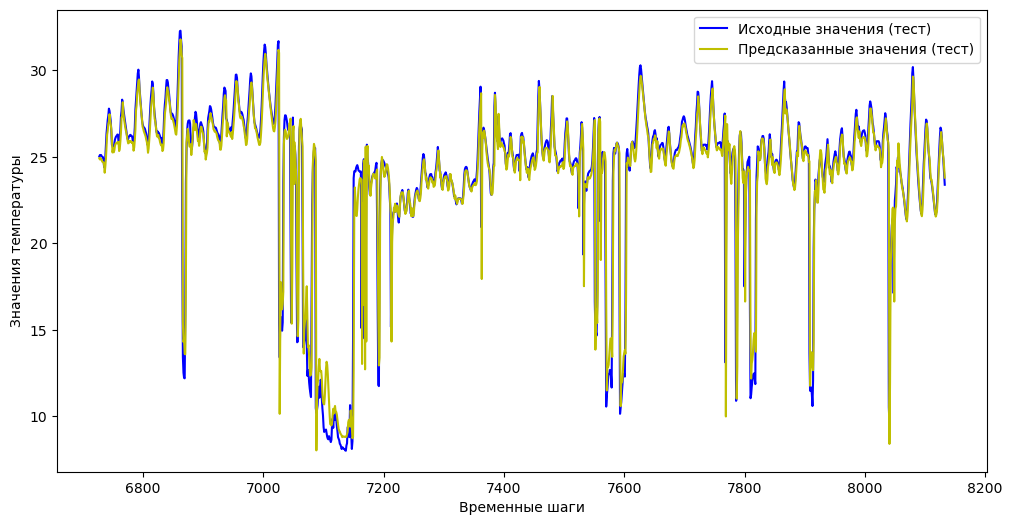

In [86]:
import matplotlib.pyplot as plt

test_size = len(X_test)

train_time_steps = range(sequence_lenght, sequence_lenght + train_size)
test_time_steps = range(sequence_lenght + train_size, sequence_lenght + train_size + test_size)

plt.figure(figsize=(12, 6))
plt.plot(test_time_steps, y_test_reversed.squeeze(1), label='Исходные значения (тест)', color='b')
plt.plot(test_time_steps, predicted_temperature.squeeze(1), label='Предсказанные значения (тест)', color='y')

plt.xlabel("Временные шаги")
plt.ylabel("Значения температуры")
plt.legend()
plt.show()